### Spam Data

- Load the spam data set.
- Create and explore bigrams for the spam data. Visualize them with a word cloud. How do they compare with the ham bigrams?
- Is there any overlap in the bigrams for the spam data and the ham data?
- Create and explore with trigrams (i.e. a n-gram with an n of 3) for both the spam and ham data.

In [92]:
import pandas as pd
import numpy as np

import re
import unicodedata
import nltk

from wordcloud import WordCloud
import matplotlib.pyplot as plt
import seaborn as sns

#### Load the spam data set

In [82]:
df = pd.read_csv("spam_clean.csv")

In [83]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
label    5572 non-null object
text     5572 non-null object
dtypes: object(2)
memory usage: 87.2+ KB


,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [84]:
def clean(text):
    'A simple function to cleanup text data'
    wnl = nltk.stem.WordNetLemmatizer()
    stopwords = nltk.corpus.stopwords.words('english') + ADDITIONAL_STOPWORDS
    text = (unicodedata.normalize('NFKD', text)
             .encode('ascii', 'ignore')
             .decode('utf-8', 'ignore')
             .lower())
    words = re.sub(r'[^\w\s]', '', text).split()
    return [wnl.lemmatize(word) for word in words if word not in stopwords]

ADDITIONAL_STOPWORDS = ['r', 'u', '2', 'ltgt']

#### Create and explore bigrams for the spam data. Visualize them with a word cloud. How do they compare with the ham bigrams?

In [85]:
ham_words = clean(' '.join(df[df.label == 'ham'].text))
spam_words = clean(' '.join(df[df.label == 'spam'].text))
all_words = clean(' '.join(df.text))

In [109]:
spam_bigram = pd.Series(nltk.ngrams(spam_words, 2)).value_counts().head(20)
spam_bigram

(please, call)          44
(customer, service)     27
(po, box)               24
(a1000, cash)           23
(guaranteed, call)      23
(prize, guaranteed)     22
(chance, win)           19
(send, stop)            19
(selected, receive)     19
(every, week)           19
(await, collection)     19
(land, line)            18
(urgent, mobile)        18
(valid, 12hrs)          17
(claim, call)           17
(prize, claim)          16
(account, statement)    16
(sae, tc)               16
(call, 08000930705)     16
(trying, contact)       15
dtype: int64

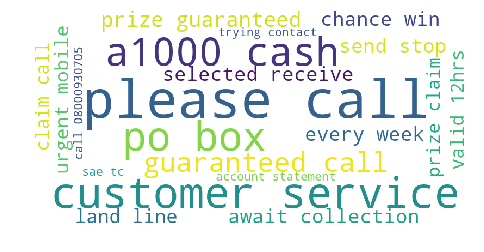

In [117]:
data = {k[0] + ' ' + k[1]: v for k, v in spam_bigram.to_dict().items()}
img = WordCloud(background_color='white', width=800, height=400).generate_from_frequencies(data)
plt.figure(figsize=(8, 4))
plt.imshow(img)
plt.axis('off')
plt.show()

In [122]:
ham_bigram = pd.Series(nltk.ngrams(ham_words, 2)).value_counts().head(20)
ham_bigram

(call, later)      52
(ill, call)        48
(let, know)        42
(sorry, ill)       39
(dont, know)       32
(good, morning)    31
(new, year)        30
(take, care)       26
(im, going)        24
(pls, send)        22
(ok, lor)          22
(im, gonna)        20
(good, night)      19
(happy, new)       19
(wat, time)        18
(last, night)      18
(hi, hi)           18
(great, day)       17
(want, go)         15
(dont, want)       15
dtype: int64

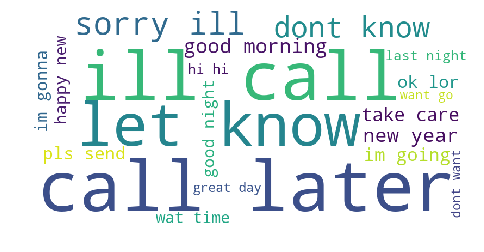

In [123]:
data = {k[0] + ' ' + k[1]: v for k, v in ham_bigram.to_dict().items()}
img = WordCloud(background_color='white', width=800, height=400).generate_from_frequencies(data)
plt.figure(figsize=(8, 4))
plt.imshow(img)
plt.axis('off')
plt.show()

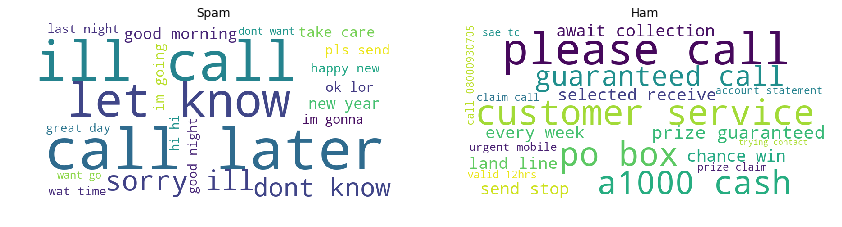

In [154]:
data = {k[0] + ' ' + k[1]: v for k, v in ham_bigram.to_dict().items()}
ham_cloud = WordCloud(background_color='white', width=800, height=400).generate_from_frequencies(data)

data = {k[0] + ' ' + k[1]: v for k, v in spam_bigram.to_dict().items()}
spam_cloud = WordCloud(background_color='white', width=800, height=400).generate_from_frequencies(data)


plt.figure(figsize=(10, 8))
axs = [plt.axes([0, 0, .5, 1]), plt.axes([.6, 0, .5, 1])]

axs[0].imshow(ham_cloud)
axs[1].imshow(spam_cloud)

axs[0].set_title('Spam')
axs[1].set_title('Ham')

for ax in axs: ax.axis('off')

#### Is there any overlap in the bigrams for the spam data and the ham data?

#### Create and explore with trigrams (i.e. a n-gram with an n of 3) for both the spam and ham data.

Explore the blog articles using the techniques discussed in the exploration lesson.

Explore the news articles using the techniques discussed in the exploration lesson. Use the category variable when exploring.